In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

def linear_transform(start, end, time):
    
    return time * end + (1 - time) * start

T = create_vector(0,1,0.01)

## Twisted Cubic $2_3$

In [2]:
def twisted_cubic(z):
    
    return np.array([z ** 3, 3 * z ** 2 * (1 - z), 3 * z * (1 - z) ** 2, (1 - z) ** 3 ])

In [3]:
W = np.array(list(map(twisted_cubic,T)))

In [4]:
basis = []
basis.append([-0.405661902390, 0.811159378849, 0.421258687973])
basis.append([0.982122508809, 0.143498413265, -0.121834238060])
basis.append([-0.426168178208, -0.161832264625, -0.890051122755])
basis.append([-0.150292427279, -0.792825528421, 0.590626672842])
basis = np.array(basis)

bounds = []

for i in range(len(basis)): 
    for j in range(len(basis)):
        if i < j:
            bounds.append(np.array(list(map(lambda t : linear_transform(basis[i], basis[j], t),T))))

In [5]:
transformed = []
for new_point in W:
    transformed_point = np.zeros(3)
    for coord, basis_vec in zip(new_point, basis):        
        transformed_point += coord * basis_vec
    transformed.append(transformed_point)
    
transformed = np.array(transformed)

<IPython.core.display.Javascript object>


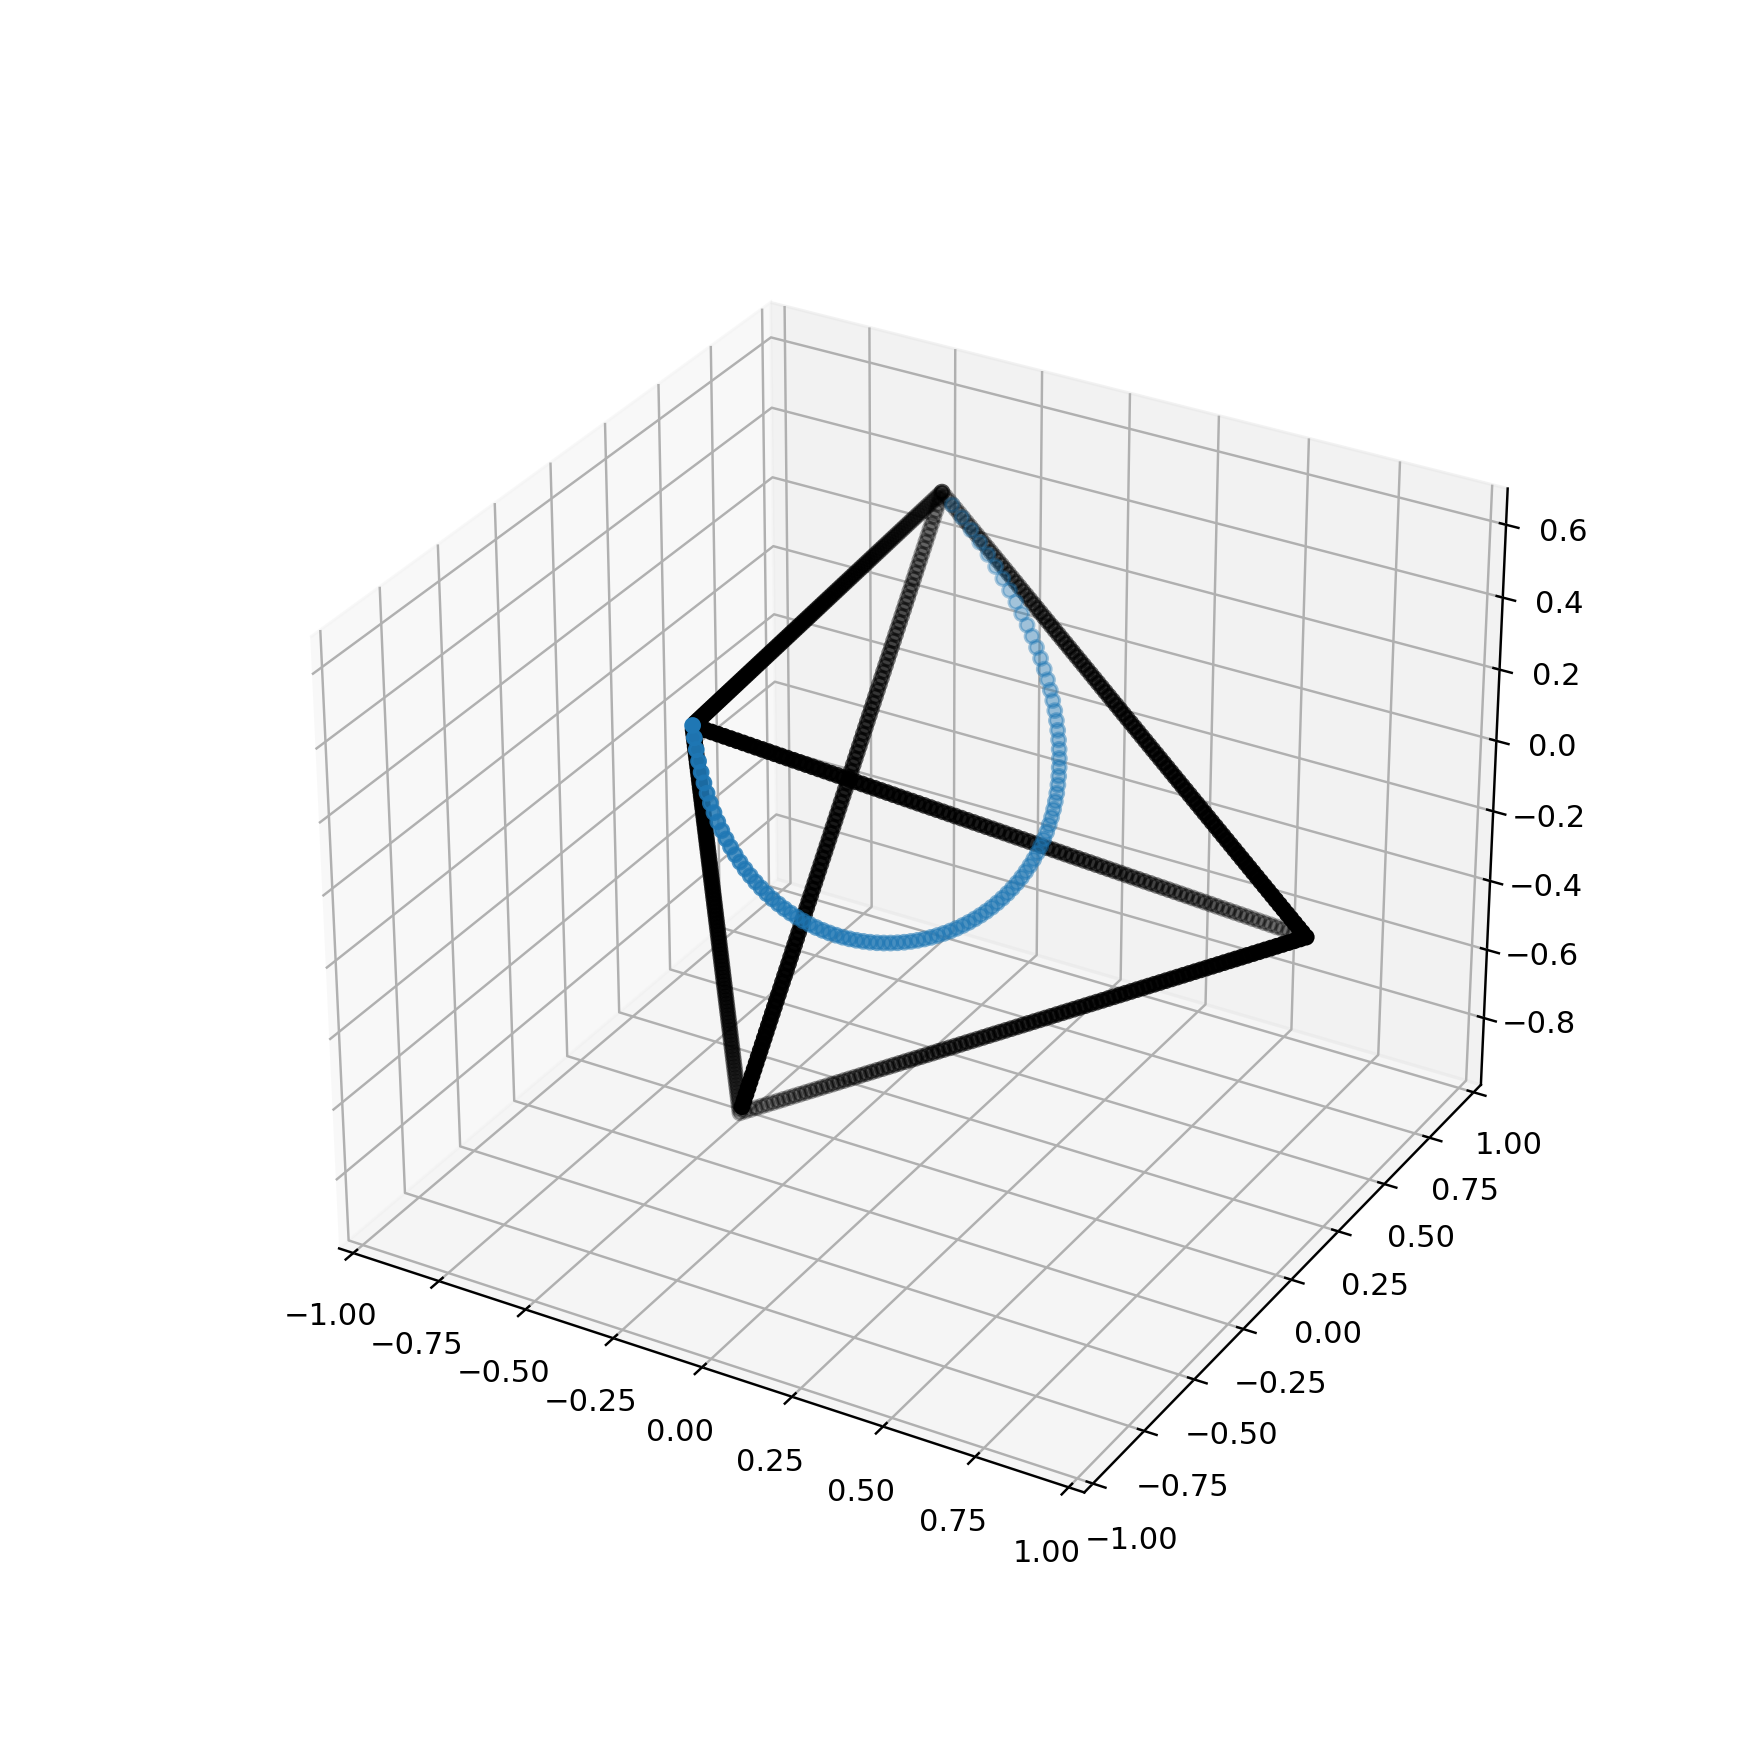

In [6]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
for i in range(len(bounds)):
    ax.scatter3D(bounds[i][:,0], bounds[i][:,1], bounds[i][:,2], color='black')
ax.scatter3D(transformed[:,0], transformed[:,1], transformed[:,2])
ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1)  
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.set_aspect('equal', adjustable='box')
plt.show()

## Polyhedrons in Sage

We want to stipulate a polyhedron 
$$|x_i - x_j| \leq d_{i,j}$$

given by 

$$d = (d_{12}, d_{13}, d_{14}, d_{23}, d_{24}, d_{34}) = (1,1,1,1,1,1)$$

We immediately translate this in the system of absolute-valued algebraic inequalities: 

$$\begin{cases}
|x_1 - x_2| \leq 1 \\
|x_1 - x_3| \leq 1 \\
|x_1 - x_4| \leq 1 \\
|x_2 - x_3| \leq 1 \\
|x_2 - x_4| \leq 1 \\
|x_3 - x_4| \leq 1
\end{cases}$$

Expanding this to remove the complexity of the inequality, we get: 

$$\begin{cases}
x_1 - x_2 \leq 1 \\
x_2 - x_1 \leq 1 \\
x_1 - x_3 \leq 1 \\
x_3 - x_1 \leq 1 \\
x_1 - x_4 \leq 1 \\
x_4 - x_1 \leq 1 \\
x_2 - x_3 \leq 1 \\
x_3 - x_2 \leq 1 \\
x_2 - x_4 \leq 1 \\
x_4 - x_2 \leq 1 \\
x_3 - x_4 \leq 1 \\
x_4 - x_2 \leq 1
\end{cases}$$

Lastly, in order for our polynomial to be within $\mathbb R^n \setminus \mathbb R (1,1,1)$, we stipulate that 

$$x \perp (1,1,1,1) \implies x \cdot (1,1,1,1) = 0 \implies x_1 + x_2 + x_3 + x_4 = 0$$

Therefore, we have a polynomial defined as the following: 

$$P = \{ x \in \mathbb R^3: Ax \leq b, c^T x = 0\}$$

where 

$$A = \begin{pmatrix} 
1 & -1 & 0 & 0 \\
-1 & 1 & 0 & 0 \\
1 & 0 & -1 & 0 \\
-1 & 0 & 1 & 0 \\
1 & 0 & 0 & -1 \\
-1 & 0 & 0 & 1 \\
0 & -1 & 1 & 0 \\
0 & 1 & -1 & 0 \\
0 & 1 & 0 & -1 \\
0 & -1 & 0 & 1 \\
0 & 0 & 1 & -1 \\
0 & 0 & -1 & 1 \\
\end{pmatrix}$$

$$b = \begin{pmatrix}
1 \\ 
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\ 
1 \\
1 \\
1 \\
1 \\
1
\end{pmatrix}$$

and 


$$c = \begin{pmatrix}
1 \\ 
1 \\
1 \\
1
\end{pmatrix}$$

Now, a strange behavior of Sage is that it wants it's inequalities to be specfied in the following way: 

$$d + Ex \geq 0$$

$$f + Gx = 0$$

Therefore, we need to transform the above as follows: 

$$Ax \leq b \implies b - Ax \geq 0 $$

In [7]:
a_1 = [1,-1,1,0,0]
a_2 = [1,1,-1,0,0]
a_3 = [1,-1,0,1,0]
a_4 = [1,1,0,-1,0]
a_5 = [1,-1,0,0,1]
a_6 = [1,1,0,0,-1]
a_7 = [1,0,-1,1,0]
a_8 = [1,0,1,-1,0]
a_9 = [1,0,1,0,-1]
a_10 = [1,0,-1,0,1]
a_11 = [1,0,0,-1,1]
a_12 = [1,0,0,1,-1]

In [8]:
P = Polyhedron(ieqs=[a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,a_11,a_12], eqns=[[0,1,1,1,1]])

In [9]:
V = []
for v in P.Vrepresentation():
    V.append(v.vector())

In [10]:
V

[(-1/2, 1/2, -1/2, 1/2),
 (-1/2, -1/2, 1/2, 1/2),
 (1/2, 1/2, -1/2, -1/2),
 (1/4, 1/4, 1/4, -3/4),
 (1/4, 1/4, -3/4, 1/4),
 (3/4, -1/4, -1/4, -1/4),
 (1/2, -1/2, 1/2, -1/2),
 (-1/2, 1/2, 1/2, -1/2),
 (1/4, -3/4, 1/4, 1/4),
 (1/2, -1/2, -1/2, 1/2),
 (-1/4, 3/4, -1/4, -1/4),
 (-1/4, -1/4, 3/4, -1/4),
 (-1/4, -1/4, -1/4, 3/4),
 (-3/4, 1/4, 1/4, 1/4)]

In [11]:
len(V)

14

## Polyhedron Duals in Sage

Now the Dual is defined (specific to the above form of $P$) to be: 

$$P^* = \{ x \in \mathbb R^4 : B x \leq 1, c^T x = 0 \} = \{ x \in \mathbb R^3 : 1 - B x \geq 0, c^T x = 0 \}$$

where 

$$B = \begin{pmatrix}
-1/2 & 1/2 & -1/2 & 1/2 \\
-1/2 & -1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & -1/2 & -1/2 \\
1/4 & 1/4 & 1/4 & -3/4 \\
3/4 & -1/4 & -1/4 & -1/4 \\
3/4 & -1/4 & -1/4 & -1/4 \\
1/2 & -1/2 & 1/2 & -1/2 \\
-1/2 & 1/2 & 1/2 & -1/2 \\
1/4 & -3/4 & 1/4 & 1/4 \\
1/2 & -1/2 & -1/2 & 1/2 \\
-1/4 & 3/4 & -1/4 & -1/4 \\
-1/4 & -1/4 & 3/4 & -1/4 \\
-1/4 & -1/4 & -1/4 & 3/4 \\
-3/4 & 1/4 & 1/4 & 1/4 
\end{pmatrix}$$

In [12]:
b_1 = [1, -V[0][0], -V[0][1], -V[0][2], -V[0][3]]
b_2 = [1, -V[1][0], -V[1][1], -V[1][2], -V[1][3]]
b_3 = [1, -V[2][0], -V[2][1], -V[2][2], -V[2][3]]
b_4 = [1, -V[3][0], -V[3][1], -V[3][2], -V[3][3]]
b_5 = [1, -V[4][0], -V[4][1], -V[4][2], -V[4][3]]
b_6 = [1, -V[5][0], -V[5][1], -V[5][2], -V[5][3]]
b_7 = [1, -V[6][0], -V[6][1], -V[6][2], -V[6][3]]
b_8 = [1, -V[7][0], -V[7][1], -V[7][2], -V[7][3]]
b_9 = [1, -V[8][0], -V[8][1], -V[8][2], -V[8][3]]
b_10 = [1, -V[9][0], -V[9][1], -V[9][2], -V[9][3]]
b_11 = [1, -V[10][0], -V[10][1], -V[10][2], -V[10][3]]
b_12 = [1, -V[11][0], -V[11][1], -V[11][2], -V[11][3]]
b_13 = [1, -V[12][0], -V[12][1], -V[12][2], -V[12][3]]
b_14 = [1, -V[13][0], -V[13][1], -V[13][2], -V[13][3]]

In [13]:
P_star = Polyhedron(ieqs=[b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10, b_11, b_12, b_13, b_14], eqns=[[0,1,1,1,1]])

In [14]:
P_star.Vrepresentation()

(A vertex at (-1, 1, 0, 0),
 A vertex at (-1, 0, 1, 0),
 A vertex at (-1, 0, 0, 1),
 A vertex at (1, -1, 0, 0),
 A vertex at (1, 0, -1, 0),
 A vertex at (0, 1, 0, -1),
 A vertex at (0, 0, -1, 1),
 A vertex at (0, -1, 1, 0),
 A vertex at (0, 0, 1, -1),
 A vertex at (0, -1, 0, 1),
 A vertex at (0, 1, -1, 0),
 A vertex at (1, 0, 0, -1))

In [15]:
D = []
for d in P_star.Vrepresentation():
    D.append(d.vector())

In [16]:
D

[(-1, 1, 0, 0),
 (-1, 0, 1, 0),
 (-1, 0, 0, 1),
 (1, -1, 0, 0),
 (1, 0, -1, 0),
 (0, 1, 0, -1),
 (0, 0, -1, 1),
 (0, -1, 1, 0),
 (0, 0, 1, -1),
 (0, -1, 0, 1),
 (0, 1, -1, 0),
 (1, 0, 0, -1)]

## Wasserstein Balls in Sage

Lastly, if we want to generate a Wasserstein ball. We simply define the Ball to be: 

$$B_r(\mu) = \mu + r P^* = \{ x\in \mathbb R^3: B(x - \mu) \leq r, c^T x = 1 \}$$

$$\implies B_r(\mu) = \{ x\in \mathbb R^3:  (r + B \mu) - B x \geq 0, c^T x = 1 \}$$

**Assumption:** $\mu \in \Delta_2 \implies c^T \mu = \mu_1 + \mu_2 + \mu_3 = 1$

In [17]:
r = 1/6
mu = [1/3, 1/3, 1/3, 1/3]

In [18]:
basis = []
basis.append([-0.405661902390, 0.811159378849, 0.421258687973])
basis.append([0.982122508809, 0.143498413265, -0.121834238060])
basis.append([-0.426168178208, -0.161832264625, -0.890051122755])
basis.append([-0.150292427279, -0.792825528421, 0.590626672842])
basis = np.array(basis)

bounds = []

for i in range(len(basis)): 
    for j in range(len(basis)):
        if i < j:
            bounds.append(np.array(list(map(lambda t : linear_transform(basis[i], basis[j], t),T))))

In [19]:
B = np.zeros((14,4))

for i in range(14):
    for j in range(4):
        B[i][j] = V[i][j]

In [20]:
b = B @ mu + r * np.ones((14))

In [21]:
b_1 = [b[0], -V[0][0], -V[0][1], -V[0][2], -V[0][3]]
b_2 = [b[1], -V[1][0], -V[1][1], -V[1][2], -V[1][3]]
b_3 = [b[2], -V[2][0], -V[2][1], -V[2][2], -V[2][3]]
b_4 = [b[3], -V[3][0], -V[3][1], -V[3][2], -V[3][3]]
b_5 = [b[4], -V[4][0], -V[4][1], -V[4][2], -V[4][3]]
b_6 = [b[5], -V[5][0], -V[5][1], -V[5][2], -V[5][3]]
b_7 = [b[6], -V[6][0], -V[6][1], -V[6][2], -V[6][3]]
b_8 = [b[7], -V[7][0], -V[7][1], -V[7][2], -V[7][3]]
b_9 = [b[8], -V[8][0], -V[8][1], -V[8][2], -V[8][3]]
b_10 = [b[9], -V[9][0], -V[9][1], -V[9][2], -V[9][3]]
b_11 = [b[10], -V[10][0], -V[10][1], -V[10][2], -V[10][3]]
b_12 = [b[11], -V[11][0], -V[11][1], -V[11][2], -V[11][3]]
b_13 = [b[12], -V[12][0], -V[12][1], -V[12][2], -V[12][3]]
b_14 = [b[13], -V[13][0], -V[13][1], -V[13][2], -V[13][3]]

In [22]:
P_star = Polyhedron(ieqs=[b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10, b_11, b_12, b_13, b_14], eqns=[[1,-1,-1,-1,-1]])

D = []
for d in P_star.Vrepresentation():
    D.append(d.vector())

In [23]:
transformed = []
for new_point in D:
    transformed_point = np.zeros(3)
    for coord, basis_vec in zip(new_point, basis):        
        transformed_point += coord * basis_vec
    transformed.append(transformed_point)
    
D_star = np.array(transformed)

In [24]:
dual_bounds = []

for i in range(len(D_star)): 
    for j in range(len(D_star)):
        if i < j:
            dual_bounds.append(np.array(list(map(lambda t : linear_transform(D_star[i], D_star[j], t),T))))

<IPython.core.display.Javascript object>


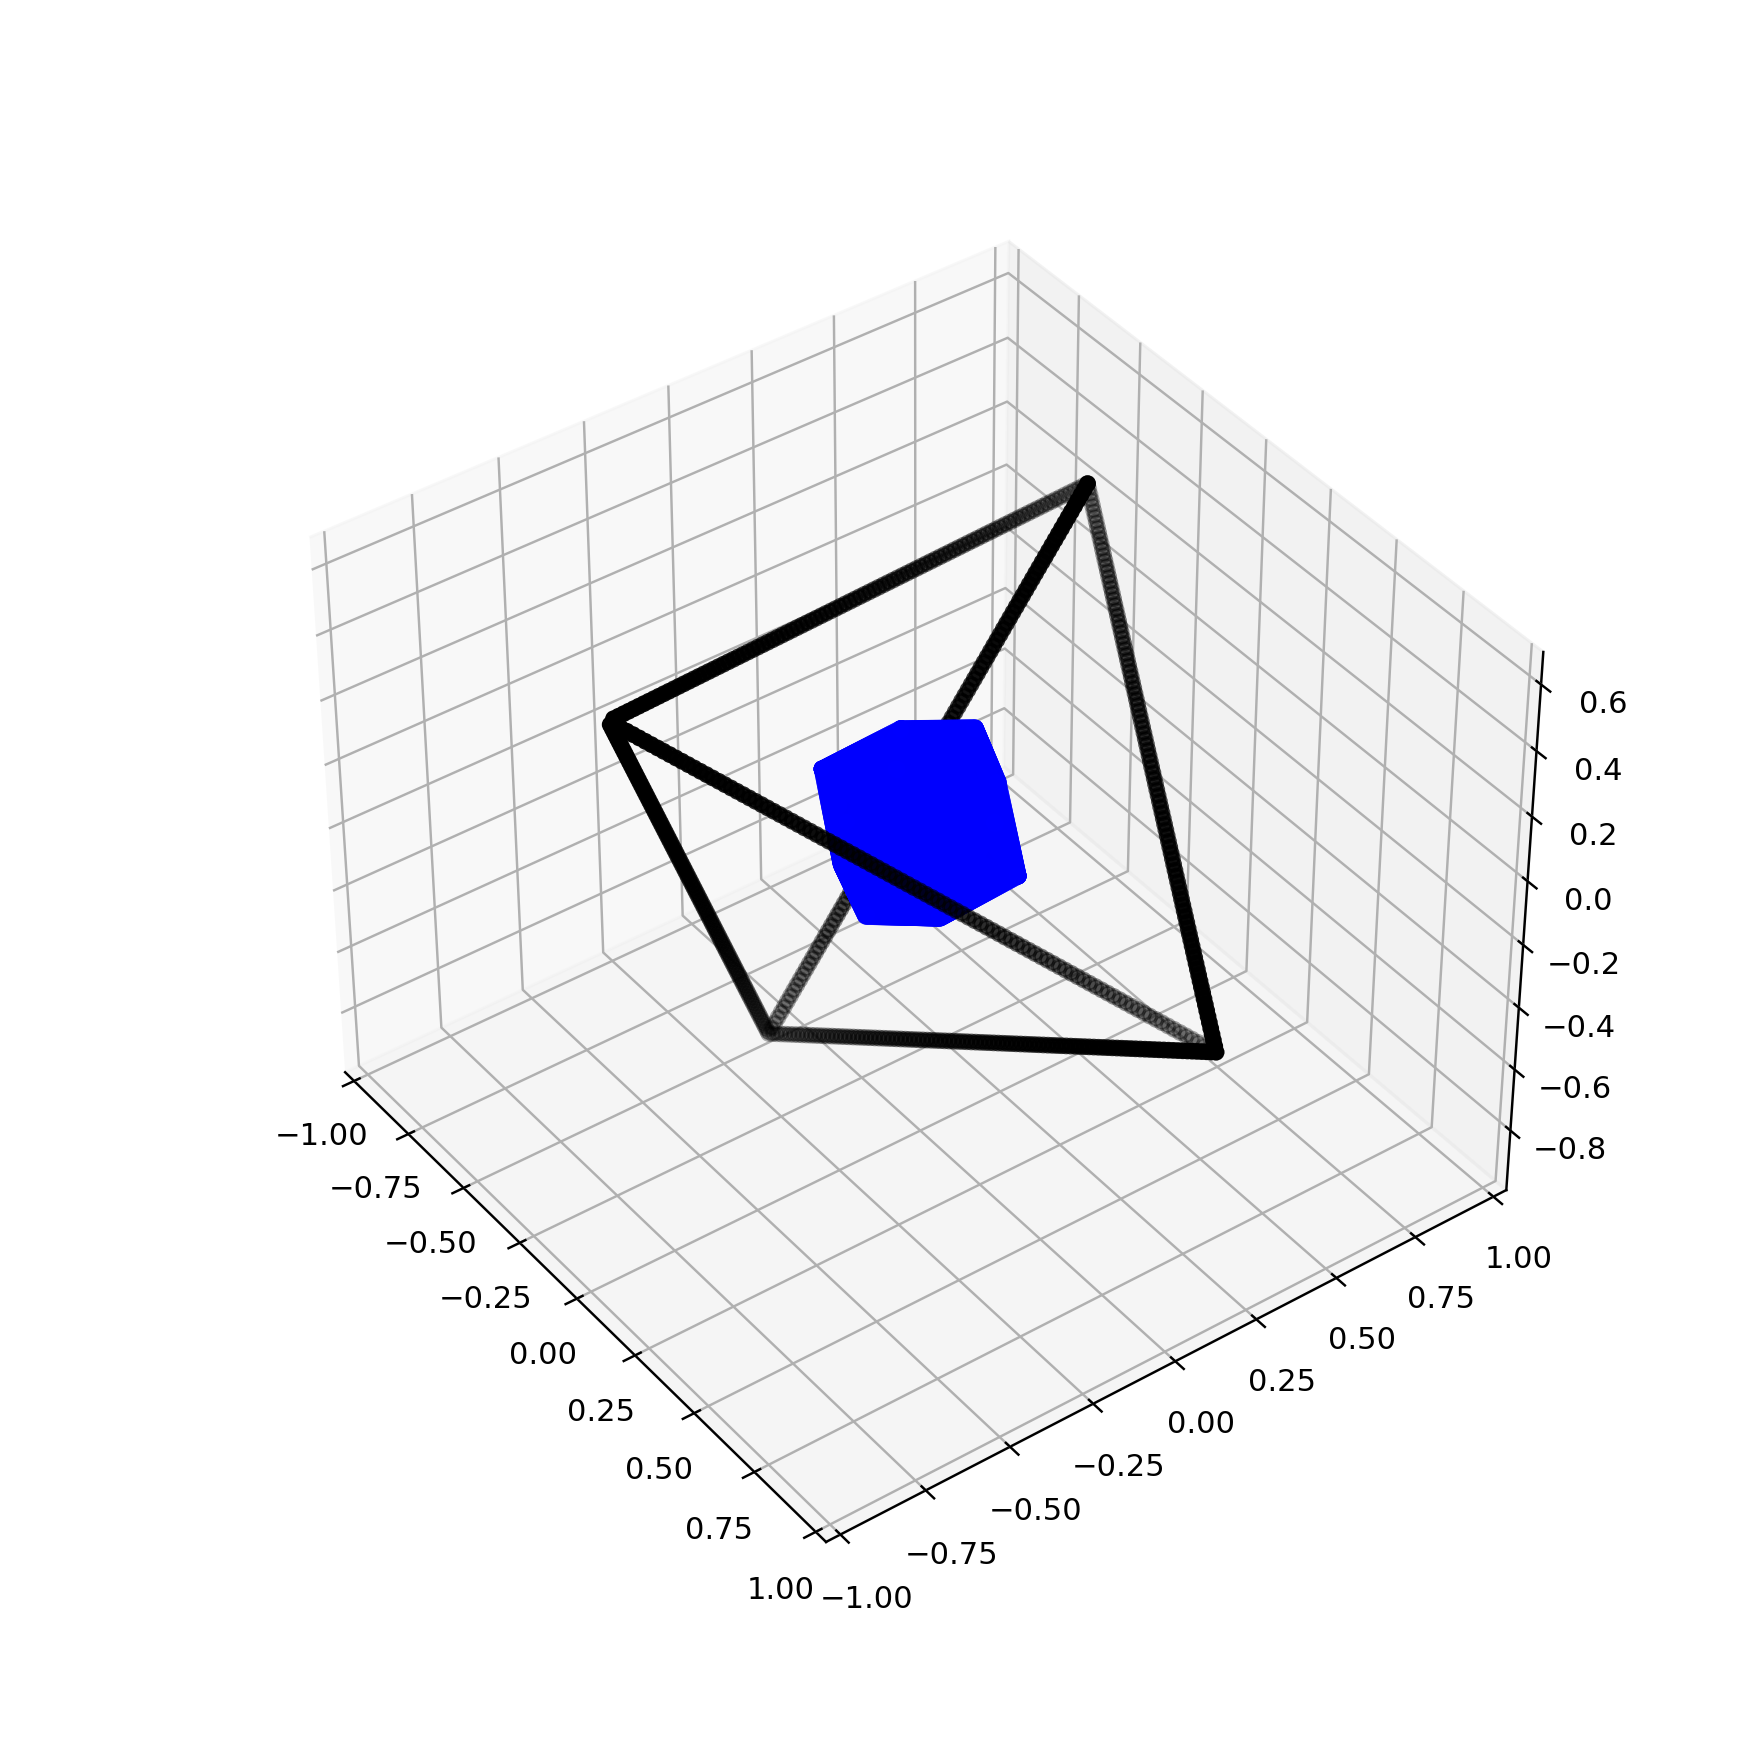

In [25]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
for i in range(len(bounds)):
    ax.scatter3D(bounds[i][:,0], bounds[i][:,1], bounds[i][:,2], color='black')
for i in range(len(dual_bounds)):
    ax.scatter3D(dual_bounds[i][:,0], dual_bounds[i][:,1], dual_bounds[i][:,2], color='blue')
ax.axes.set_xlim3d(left=-1, right=1) 
ax.axes.set_ylim3d(bottom=-1, top=1)  
ax.axes.set_ylim3d(bottom=-1, top=1) 
ax.set_aspect('equal', adjustable='box')
plt.show()